In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
from  matplotlib import pyplot as plt

In [82]:
import warnings
warnings.filterwarnings('ignore')

In [83]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [84]:
data=pd.read_csv('D:\\python project\\time series\\gold_monthly_csv.csv')

In [85]:
data.head(5)

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [86]:
data.shape

(847, 2)

In [87]:
data.min()['Date']

'1950-01'

In [88]:
data.max()

Date      2020-07
Price    1840.807
dtype: object

In [89]:
data

,Date,Price
0,1950-01,34.730
1,1950-02,34.730
2,1950-03,34.730
3,1950-04,34.730
4,1950-05,34.730
...,...,...
842,2020-03,1593.764
843,2020-04,1680.030
844,2020-05,1715.697
845,2020-06,1734.032


In [90]:
data1 =data.copy()

data1['Date'] = pd.to_datetime(data1['Date'], format='%Y-%m')
data1.set_index('Date', inplace=True)


Text(0, 0.5, 'price')

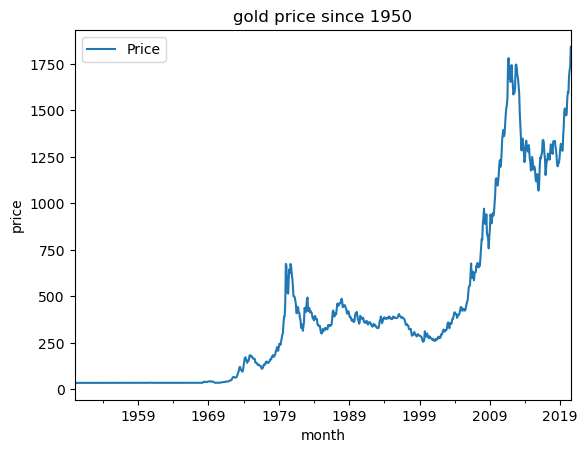

In [73]:
data1.plot()
plt.title('gold price since 1950')
plt.xlabel('month')
plt.ylabel('price')


<Axes: xlabel='Date'>

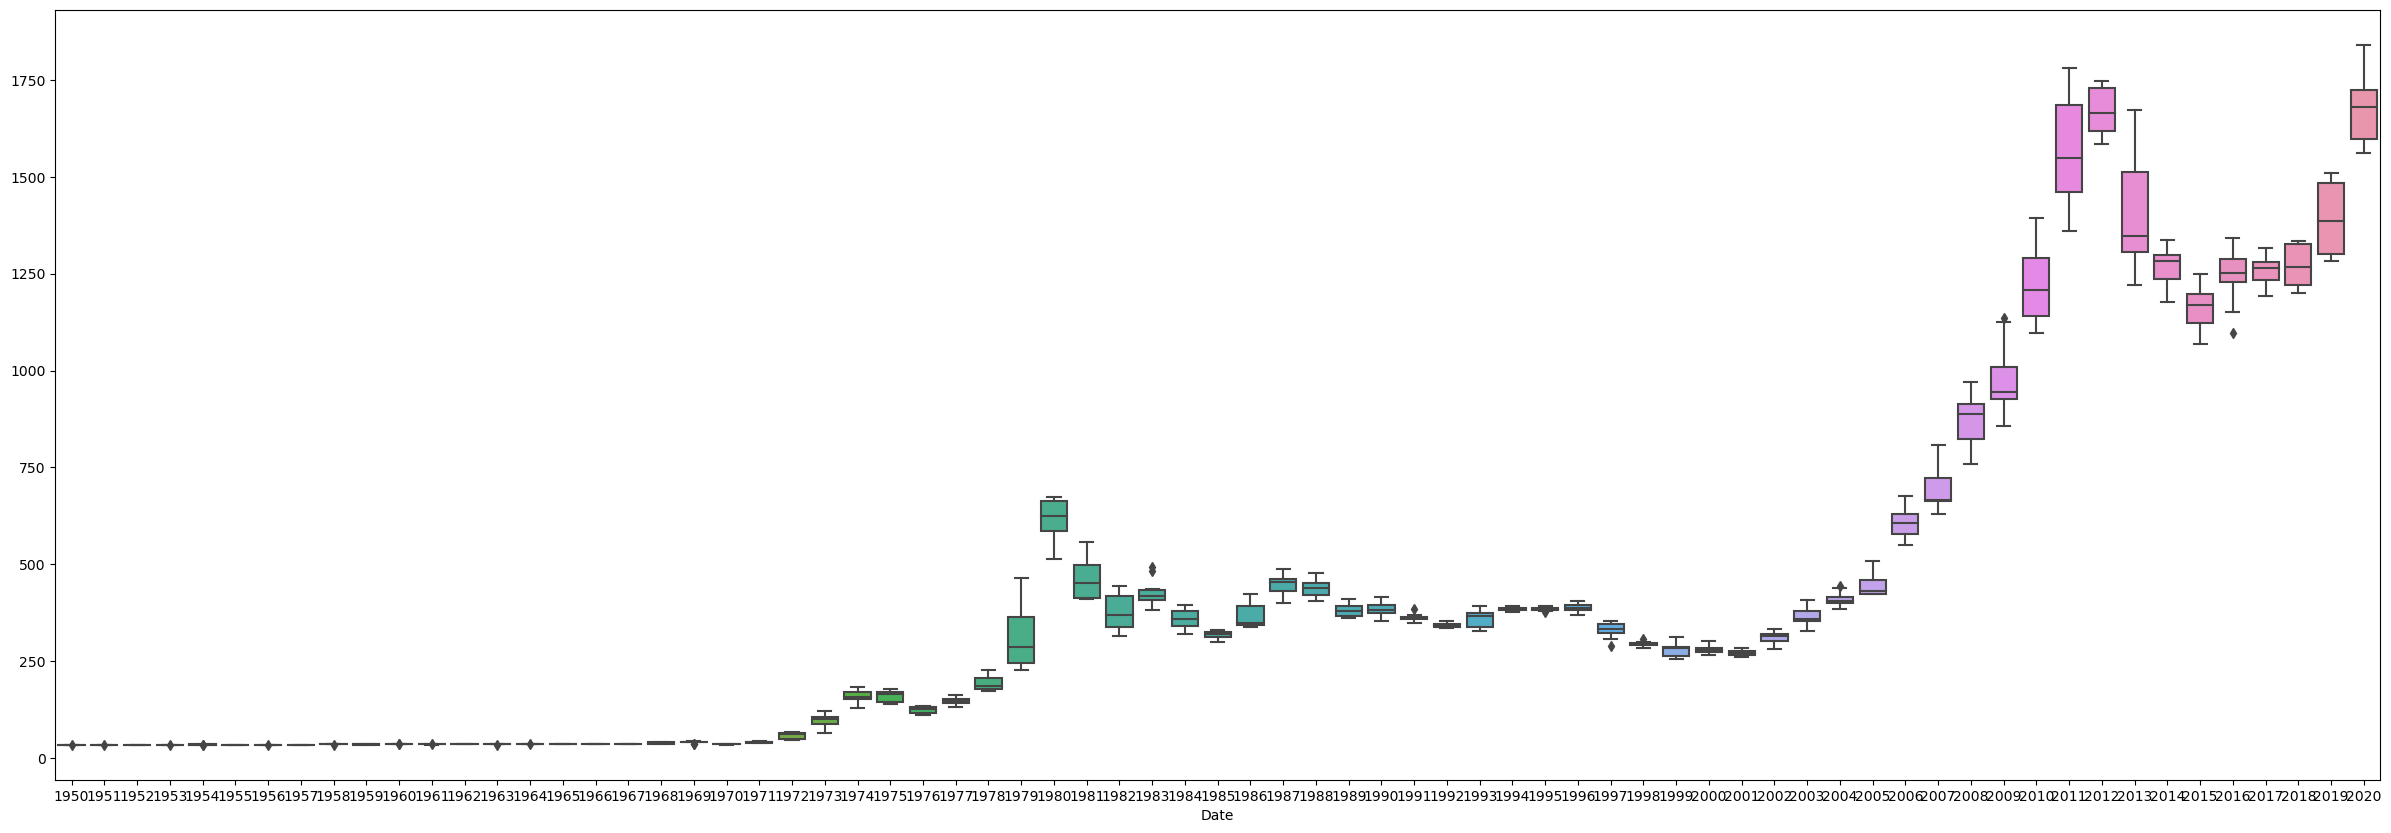

In [79]:
ye,ax=plt.subplots(figsize=(30,10))
sns.boxplot(x=data1.index.year , y=data1.values[:,0],ax=ax)

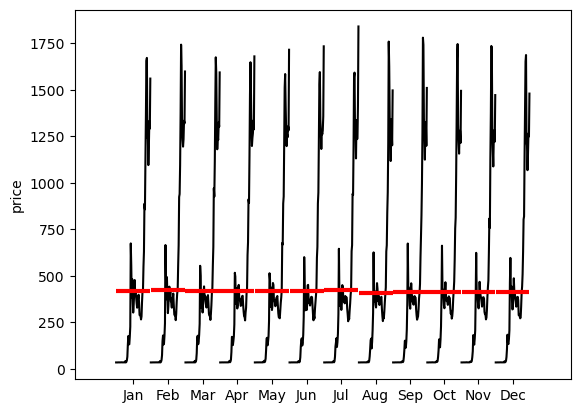

In [80]:
from statsmodels.graphics.tsaplots import month_plot
import matplotlib.pyplot as plt

# Assuming data is your time series data
# Replace it with your actual data
#data = [...]

# Create a subplot
fig, ax = plt.subplots()

# Use month_plot with the specified parameters
month_plot(data1, ylabel='price', ax=ax)

# Show the plot
plt.show()


<Axes: xlabel='Date'>

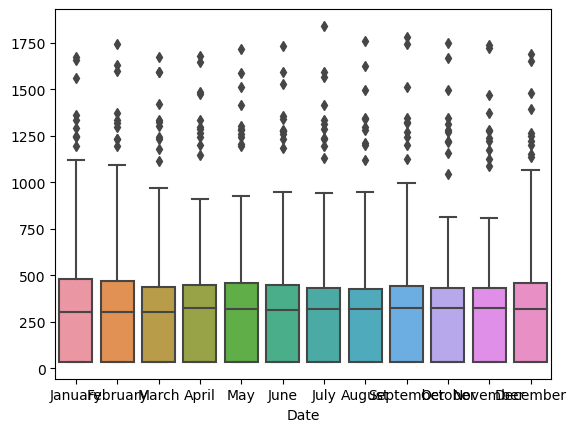

In [94]:
aa,ax= plt.subplots()
sns.boxplot(x=data1.index.month_name(),y =data1.values[:,0],ax=ax)

Text(0.5, 0, 'year')

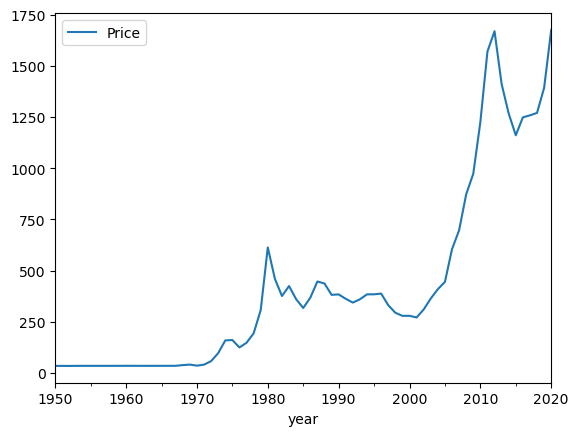

In [101]:
yearlysum=data1.resample('A').mean()
yearlysum.plot()
plt.xlabel('year')


Text(0.5, 0, 'quater')

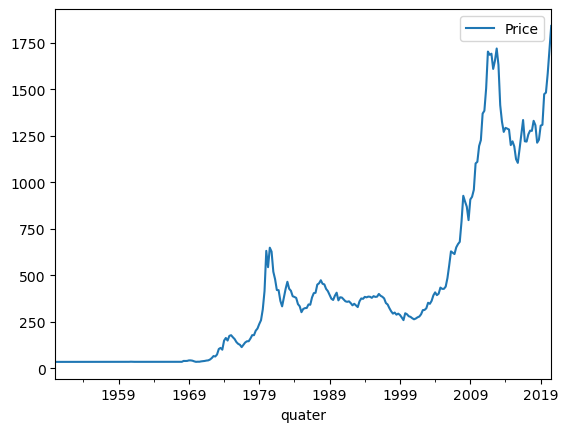

In [102]:
quarsum=data1.resample('Q').mean()
quarsum.plot()
plt.xlabel('quater')

Text(0.5, 0, 'dacade')

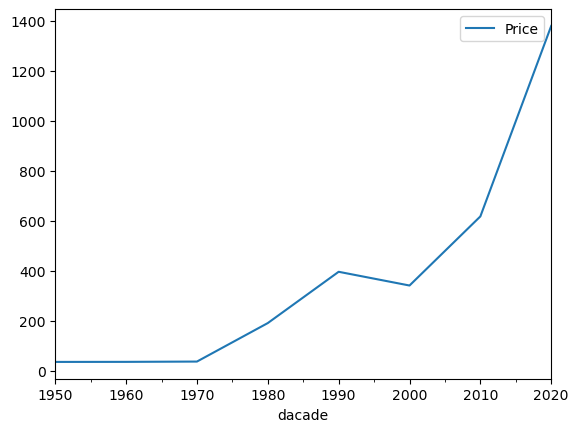

In [115]:
dacadesum=data1.resample('10Y').mean()
dacadesum.plot()
plt.xlabel('dacade')

In [117]:
data1

,Price
Date,
1950-01-01,34.730
1950-02-01,34.730
1950-03-01,34.730
1950-04-01,34.730
1950-05-01,34.730
...,...
2020-03-01,1593.764
2020-04-01,1680.030
2020-05-01,1715.697


In [124]:
# Group by year, calculate mean and standard deviation
mean_df = data1.groupby(data1.index.year)['Price'].mean().rename('Mean')
std_df = data1.groupby(data1.index.year)['Price'].std().rename('Std')

# Merge mean and standard deviation DataFrames
df1 = pd.merge(mean_df, std_df, left_index=True, right_index=True)

# Calculate percentage coefficient of variation
df1['Cov_pct'] = ((df1['Std'] / df1['Mean']) * 100).round(2)

# Print the final DataFrame
df1

,Mean,Std,Cov_pct
Date,,,
1950,34.729167,0.002887,0.01
1951,34.717500,0.020057,0.06
1952,34.628333,0.117538,0.34
1953,34.879167,0.056481,0.16
1954,35.020000,0.082792,0.24
...,...,...,...
2016,1248.161833,73.454098,5.88
2017,1257.848583,32.529524,2.59
2018,1269.852583,54.900304,4.32


In [126]:
df1=data1.groupby(data1.index.year).mean().rename(columns={'Price':'Mean'})
df1=df1.merge(data1.groupby(data1.index.year).std().rename(columns={'Price':'Std'}), left_index=True,right_index=True)
df1['cov']=((df1['Std']/df1['Mean'])*100).round(2)
df1

,Mean,Std,cov
Date,,,
1950,34.729167,0.002887,0.01
1951,34.717500,0.020057,0.06
1952,34.628333,0.117538,0.34
1953,34.879167,0.056481,0.16
1954,35.020000,0.082792,0.24
...,...,...,...
2016,1248.161833,73.454098,5.88
2017,1257.848583,32.529524,2.59
2018,1269.852583,54.900304,4.32


<Axes: xlabel='Date'>

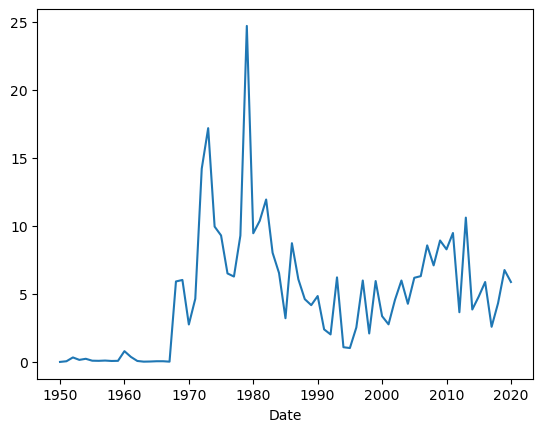

In [127]:
figur,ax=plt.subplots()
df1['cov'].plot()

In [148]:
train=data1[data1.index.year <=2015]
test=data1[data1.index.year >2015]

<Axes: xlabel='Date'>

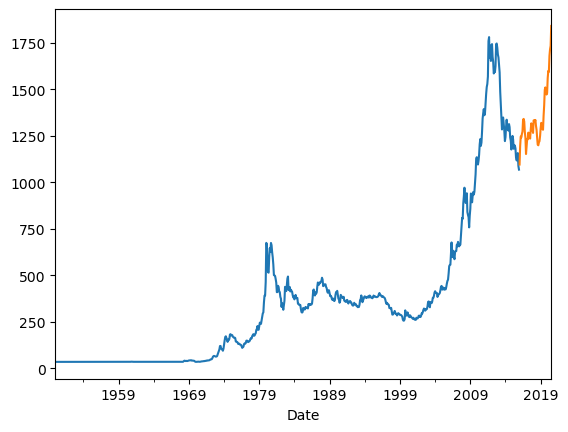

In [149]:
train['Price'].plot()
test['Price'].plot()

In [150]:
train_time=[i+1 for i in range (len(train))]
test_time=[i+1 for i in range (len(test))]
len(test_time),len(train_time)

(55, 792)

In [151]:
lr_train = train.copy()
lr_test = test.copy()
lr_test=test_time
lr_train['time']=train_time

In [152]:
from sklearn.linear_model import LinearRegression

In [153]:
lr=LinearRegression()
lr.fit(lr_train[['time']],lr_train['Price'].values)


LinearRegression()

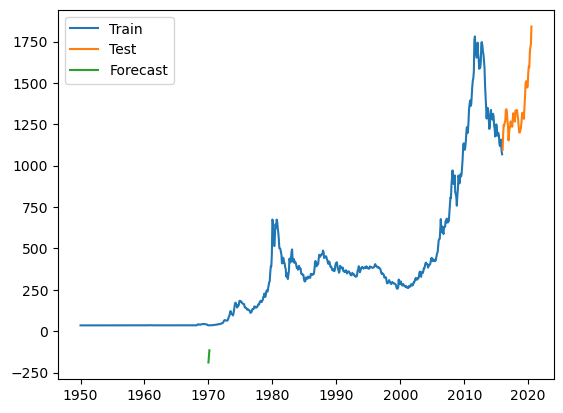

In [155]:
--------------------------------------------------------
lr_test = pd.DataFrame(lr_test, columns=['time'])
---------------------------------------------------------
test_prediction = lr.predict(lr_test[['time']])
lr_test['forecast'] = test_prediction

# Plotting
plt.plot(train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(lr_test['forecast'], label='Forecast')

# Show legend
plt.legend()

# Show the plot
plt.show()


In [156]:
def mape(actual,pred):
    return round((np.mean(abs(actual-pred)/actual))*100,2) 

In [157]:
mape_test = mape(test['Price'].values,test_prediction)
print(mape_test)

111.63


In [158]:
naive_train = train.copy()
naive_test = test.copy()

In [159]:
naive_test['naive']=np.array(train['Price'])[len(np.array(train['Price']))-1]
naive_test['naive'].head()

Date
2016-01-01    1068.317
2016-02-01    1068.317
2016-03-01    1068.317
2016-04-01    1068.317
2016-05-01    1068.317
Name: naive, dtype: float64

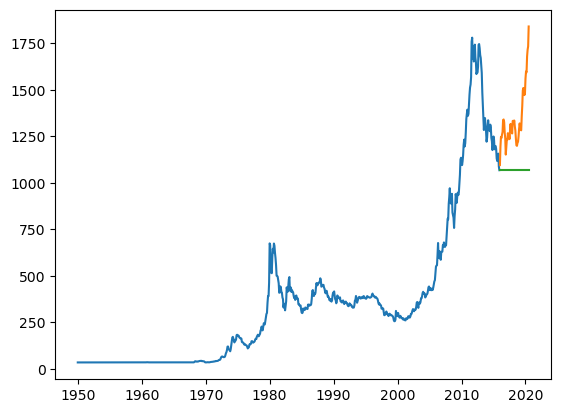

In [161]:
plt.plot(naive_train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(naive_test['naive'], label='Forecast')

In [162]:
mape_test_2=mape(test['Price'].values,naive_test['naive'].values)
mape_test_2

19.38

In [163]:
last=ExponentialSmoothing(data1,trend='additive'
                          ,seasonal='additive').fit(smoothing_level=0.4,
                                                   smoothing_trend=0.3,
                                                   smoothing_seasonal=0.6)

In [164]:
mape_last=mape(data1['Price'].values,last.fittedvalues)
mape_last

17.24

In [165]:
prediction = last.forecast(steps=len(test))

In [167]:
pred_df=pd.DataFrame({'lower':prediction-1.96*np.std(last.resid,ddof=1),
                     'prediction':prediction,
                     'upper':prediction+1.96*np.std(last.resid,ddof=1)})
pred_df.head()

,lower,prediction,upper
2020-08-01,1684.718274,1792.869246,1901.020219
2020-09-01,1615.301815,1723.452788,1831.603760
2020-10-01,1538.560879,1646.711851,1754.862823
2020-11-01,1476.748832,1584.899804,1693.050776
2020-12-01,1459.315210,1567.466182,1675.617154


<Axes: >

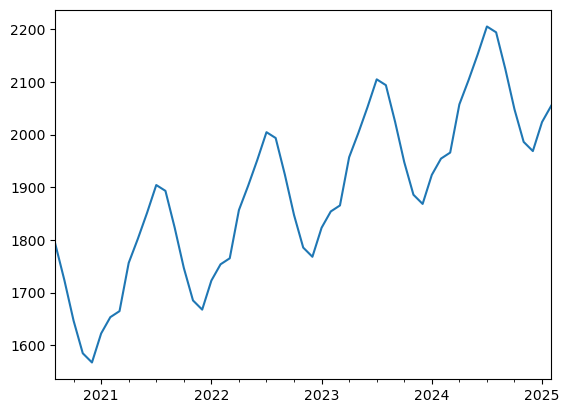

In [168]:
pred_df['prediction'].plot()